In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data_student.csv')

In [6]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
average_math = df['MathScore'].mean()
average_read =df['ReadingScore'].mean()
averge_write =df['WritingScore'].mean()
print("Average of MathScore:", average_math)
print("Average of ReadingScore:", average_read)
print("Average of WritingScore:", averge_write)

Average of MathScore: 66.5584021409223
Average of ReadingScore: 69.37753337032082
Average of WritingScore: 68.41862210763357


In [9]:
math_min = df['MathScore'].min()
reading_min = df['ReadingScore'].min()
writing_min = df['WritingScore'].min()

print("Minimum score in Math:", math_min)
print("Minimum score in Reading:", reading_min)
print("Minimum score in Writing:", writing_min)

Minimum score in Math: 0
Minimum score in Reading: 10
Minimum score in Writing: 4


In [10]:
math_max = df['MathScore'].max()
reading_max = df['ReadingScore'].max()
writing_max = df['WritingScore'].max()

print("Maximum score in Math:", math_max)
print("Maximum score in Reading:", reading_max)
print("Maximum score in Writing:", writing_max)

Maximum score in Math: 100
Maximum score in Reading: 100
Maximum score in Writing: 100


In [11]:
math_std = df['MathScore'].std()
reading_std = df['ReadingScore'].std()
writing_std = df['WritingScore'].std()

print("Standard Deviation of Math scores:", math_std)
print("Standard Deviation of Reading scores:", reading_std)
print("Standard Deviation of Writing scores:", writing_std)

Standard Deviation of Math scores: 15.3616156153448
Standard Deviation of Reading scores: 14.758951673577881
Standard Deviation of Writing scores: 15.443524814264753


In [12]:
median_score = df['MathScore'].median()
median_score = df['ReadingScore'].median()
median_score = df['WritingScore'].median()
print('The median Math score is:', median_score)
print('The median Reading score is:', median_score)
print('The median Writing score is:', median_score)

The median Math score is: 69.0
The median Reading score is: 69.0
The median Writing score is: 69.0


In [13]:
q1 = df['MathScore'].quantile(0.25)
q1 = df['ReadingScore'].quantile(0.25)
q1 = df['WritingScore'].quantile(0.25)
q3 = df['MathScore'].quantile(0.75)
q3 = df['ReadingScore'].quantile(0.75)
q3 = df['WritingScore'].quantile(0.75)
print('The first quartile (Q1) of Math score is:', q1)
print('The first quartile (Q1) of Reading score is:', q1)
print('The first quartile (Q1) of Writing score is:', q1)
print('The Third quartile (Q3) of Math score is:', q3)
print('The Third quartile (Q3) of Reading score is:', q3)
print('The Third quartile (Q3) of Writing score is:', q3)

The first quartile (Q1) of Math score is: 58.0
The first quartile (Q1) of Reading score is: 58.0
The first quartile (Q1) of Writing score is: 58.0
The Third quartile (Q3) of Math score is: 79.0
The Third quartile (Q3) of Reading score is: 79.0
The Third quartile (Q3) of Writing score is: 79.0


In [14]:
q1 = df['MathScore'].quantile(0.25)
q1 = df['ReadingScore'].quantile(0.25)
q1 = df['WritingScore'].quantile(0.25)
q3 = df['MathScore'].quantile(0.75)
q3 = df['ReadingScore'].quantile(0.75)
q3 = df['WritingScore'].quantile(0.75)
iqr = q3 - q1
print('The interquartile range (IQR) of exams score is:', iqr)

The interquartile range (IQR) of exams score is: 21.0


In [15]:
df['WklyStudyHours'].replace({"5 - 10": 0 , "< 5": 1 , "> 10":2 }, inplace=True)
correlation = df['WklyStudyHours'].corr(df['MathScore'])
print("Correlation:", correlation)

Correlation: 0.01726107007413841


In [16]:
long_study_hours = df[df['WklyStudyHours'] >= 2]
short_study_hours = df[df['WklyStudyHours'] < 2]

t_statistic, p_value = ttest_ind(long_study_hours['MathScore'], short_study_hours['MathScore'])

print("The t_statistic is:", t_statistic)
print("The p_value is:", p_value)

The t_statistic is: 11.096140216394364
The p_value is: 1.4907084527121442e-28


In [17]:
df['WklyStudyHours'].replace({"5 - 10": 0 , "< 5": 1 , "> 10":2 }, inplace=True)
correlation = df['WklyStudyHours'].corr(df['ReadingScore'])
print("Correlation:", correlation)

Correlation: 0.0014395318866465593


In [18]:
long_study_hours = df[df['WklyStudyHours'] >= 2]
short_study_hours = df[df['WklyStudyHours'] < 2]

t_statistic, p_value = ttest_ind(long_study_hours['ReadingScore'], short_study_hours['ReadingScore'])

print("The t-statistic is:", t_statistic)
print("The p-value is:", p_value)

The t-statistic is: 5.350061561573737
The p-value is: 8.857479846437264e-08


In [19]:
df['WklyStudyHours'].replace({"5 - 10": 0 , "< 5": 1 , "> 10":2 }, inplace=True)
correlation = df['WklyStudyHours'].corr(df['WritingScore'])
print("Correlation:", correlation)

Correlation: 0.009732757896799367


In [20]:
long_study_hours = df[df['WklyStudyHours'] >= 2]
short_study_hours = df[df['WklyStudyHours'] < 2]

t_statistic, p_value = ttest_ind(long_study_hours['WritingScore'], short_study_hours['WritingScore'])

print("The t-statistic is:", t_statistic)
print("The p-value is:", p_value)

The t-statistic is: 7.056319190277763
The p-value is: 1.7471926939998424e-12


In [21]:
if p_value < 0.05:
    print('There is a statistically significant difference in exam scores between students who study for long hours and those who study for short hours.')
else:
    print('There is not a statistically significant difference in exam scores between students who study for long hours and those who study for short hours.')


There is a statistically significant difference in exam scores between students who study for long hours and those who study for short hours.


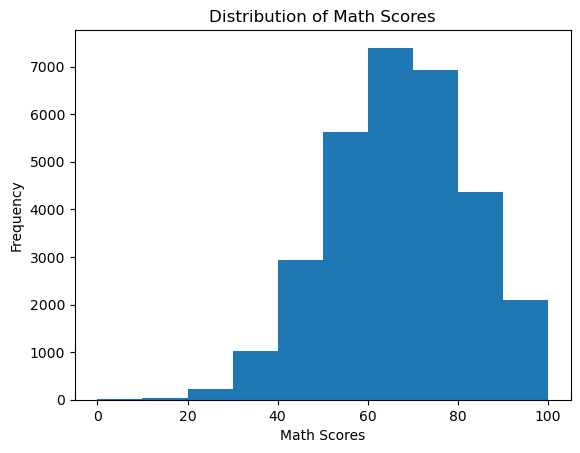

In [22]:
math_scores = df['MathScore']
plt.hist(math_scores, bins=10)  
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.show()

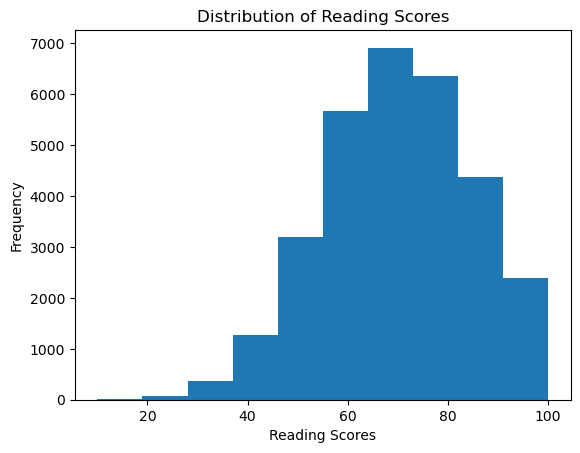

In [23]:
reading_scores = df['ReadingScore']
plt.hist(reading_scores, bins=10)  
plt.xlabel('Reading Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Scores')
plt.show()

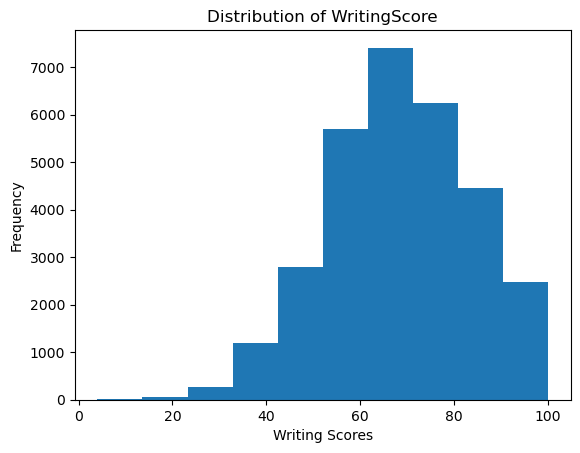

In [24]:
writing_scores = df['WritingScore']
plt.hist(writing_scores, bins=10)
plt.xlabel('Writing Scores')
plt.ylabel('Frequency')
plt.title('Distribution of WritingScore')
plt.show()

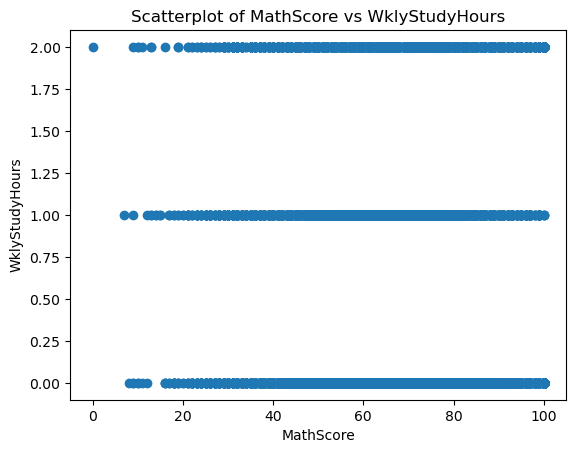

In [25]:
x = df['MathScore']
y = df['WklyStudyHours']
plt.scatter(x, y)
plt.xlabel('MathScore')
plt.ylabel('WklyStudyHours')
plt.title('Scatterplot of MathScore vs WklyStudyHours')
plt.show()

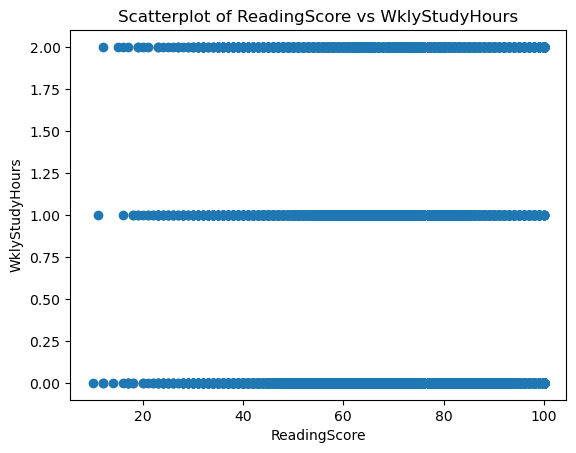

In [26]:
x = df['ReadingScore']
y = df['WklyStudyHours']
plt.scatter(x, y)
plt.xlabel('ReadingScore')
plt.ylabel('WklyStudyHours')
plt.title('Scatterplot of ReadingScore vs WklyStudyHours')
plt.show()

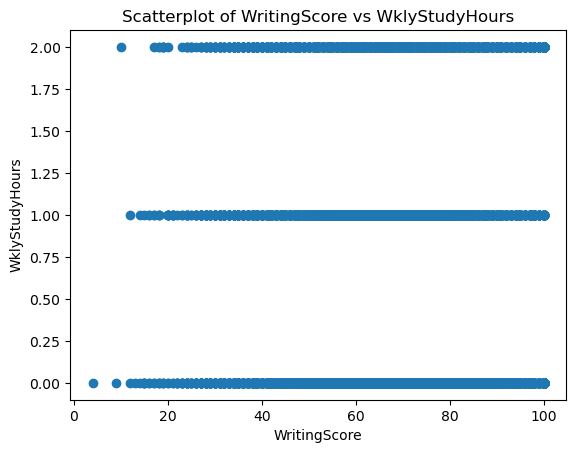

In [27]:
x = df['WritingScore']
y = df['WklyStudyHours']
plt.scatter(x, y)
plt.xlabel('WritingScore')
plt.ylabel('WklyStudyHours')
plt.title('Scatterplot of WritingScore vs WklyStudyHours')
plt.show()

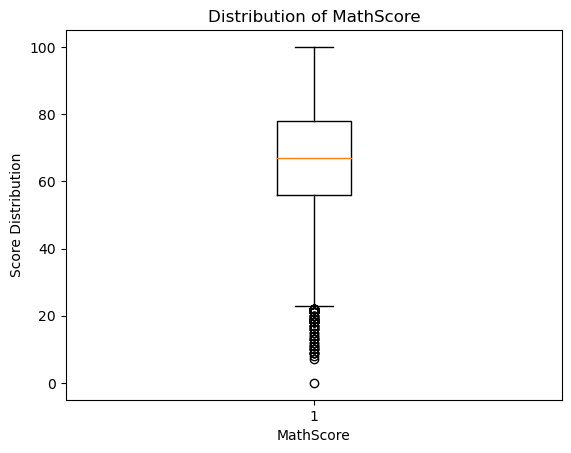

In [28]:
plt.boxplot(df['MathScore'])
plt.xlabel('MathScore')
plt.ylabel('Score Distribution')
plt.title('Distribution of MathScore')
plt.show()

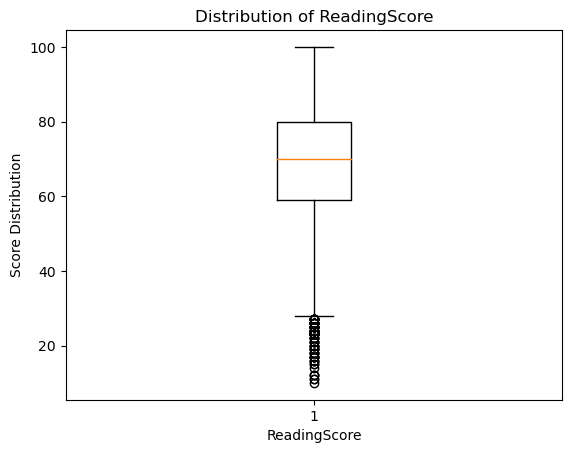

In [29]:
plt.boxplot(df['ReadingScore'])
plt.xlabel('ReadingScore')
plt.ylabel('Score Distribution')
plt.title('Distribution of ReadingScore')
plt.show()

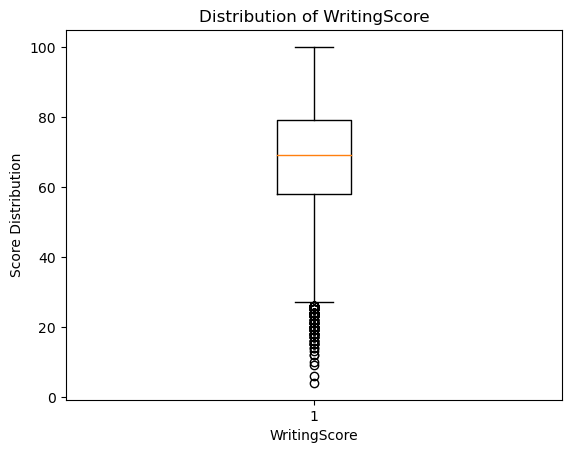

In [46]:
plt.boxplot(df['WritingScore'])
plt.xlabel('WritingScore')
plt.ylabel('Score Distribution')
plt.title('Distribution of WritingScore')
plt.show()

MathScore
0        1
7        1
8        1
9        4
10       4
      ... 
96     157
97     160
98      95
99      97
100    275
Name: count, Length: 95, dtype: int64


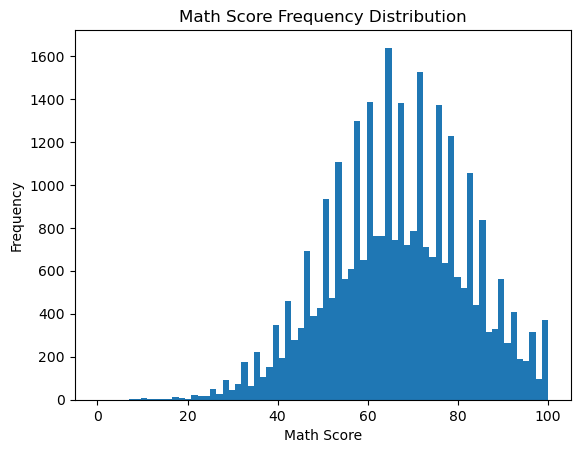

In [47]:
frequency_dist = df['MathScore'].value_counts().sort_index()

print(frequency_dist)
plt.hist(df['MathScore'], bins='auto')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Frequency Distribution')
plt.show()

ReadingScore
10       1
11       2
12       3
14       1
15       2
      ... 
96     202
97     184
98     190
99     126
100    344
Name: count, Length: 90, dtype: int64


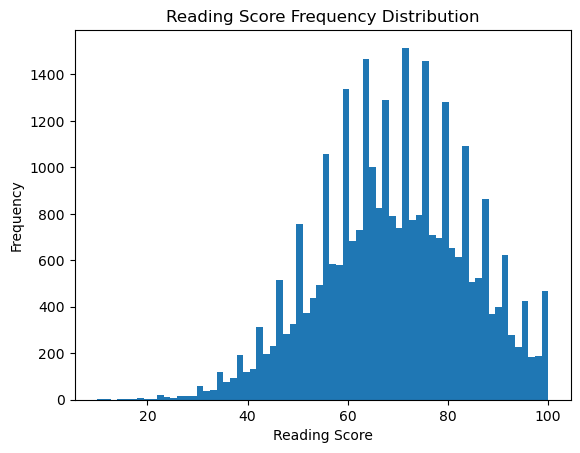

In [43]:
frequency_dist = df['ReadingScore'].value_counts().sort_index()

print(frequency_dist)
plt.hist(df['ReadingScore'], bins='auto')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Reading Score Frequency Distribution')
plt.show()

WritingScore
4        1
6        1
9        1
10       1
12       2
      ... 
96     166
97     202
98     181
99     118
100    484
Name: count, Length: 93, dtype: int64


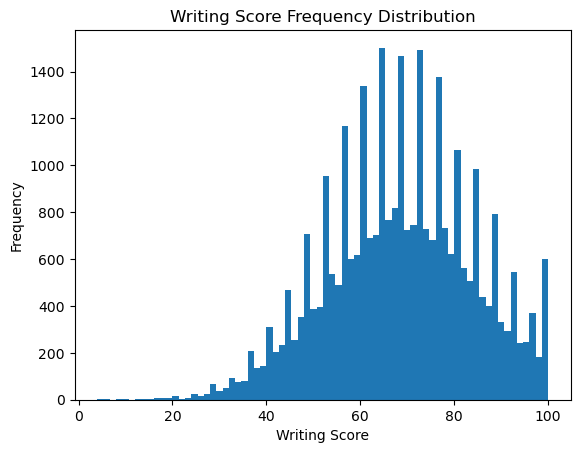

In [44]:
frequency_dist = df['WritingScore'].value_counts().sort_index()

print(frequency_dist)
plt.hist(df['WritingScore'], bins='auto')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Writing Score Frequency Distribution')
plt.show()